Notebook to compare model nowcasts with data from a few ONC moorings. Really, only the JDF AS04 has data overlapping data.

Observations are from Ocean Networks Canada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ONC
from salishsea_tools import tidetools, viz_tools
import netCDF4 as nc
import datetime
from scipy import interpolate as interp

from salishsea_tools.nowcast import analyze

%matplotlib inline


In [2]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               #'JuandeFucaStrait_JF2CMooring_CTD_20140513T234530Z_20140922T150034Z-NaN_clean.csv')
               'JuandeFucaStrait_AS04Mooring_CTD_20140513T163027Z_20150409T195029Z-NaN_clean.csv')
               #'BoundaryPass_BoundaryPassMooring_CTD_20140411T175025Z_20150408T235058Z-NaN_clean.csv')


In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'

#Strait of Juan de Fuca - AS04

##Houlry averages

Model bathymetry: 117.0
Model bathymetry: 117.0


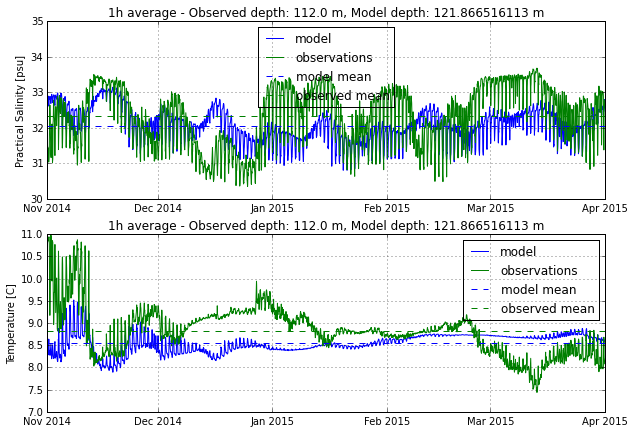

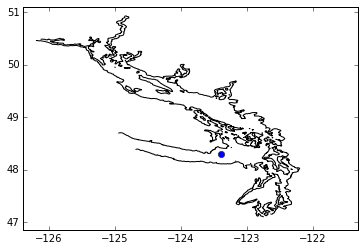

In [4]:
sdt=datetime.datetime(2014, 11, 1)
edt = datetime.datetime(2015, 4, 1)
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1h', 
                                smin=30, smax=35, tmin=7, tmax=11)

How is model depth lower than bathymetry? Probably because partial steps enables us to have a grid point at this (k, j, i) but this point isn't actually as deep as what is stored in the deptht array. Where can I get the partial steps depth -- mesh_mask.nc file I believe.

##Interpolated to observed depth

Model bathymetry: 117.0
Model bathymetry: 117.0


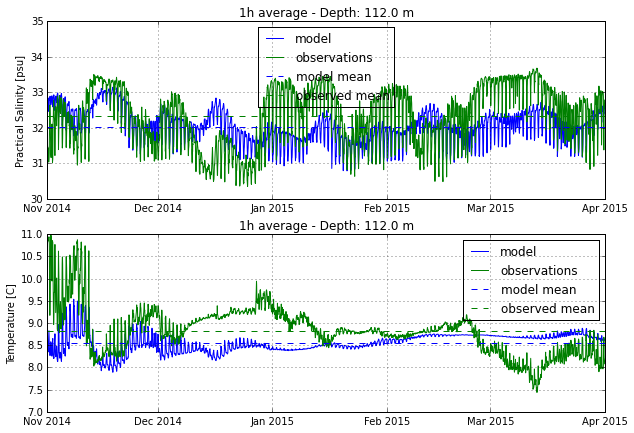

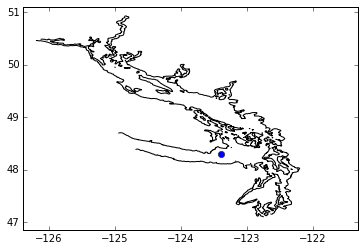

In [5]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1h', interp=True,
                                smin=30, smax=35, tmin=7, tmax=11)

## Daily averages, interpolated to observed depth

Model bathymetry: 117.0
Model bathymetry: 117.0


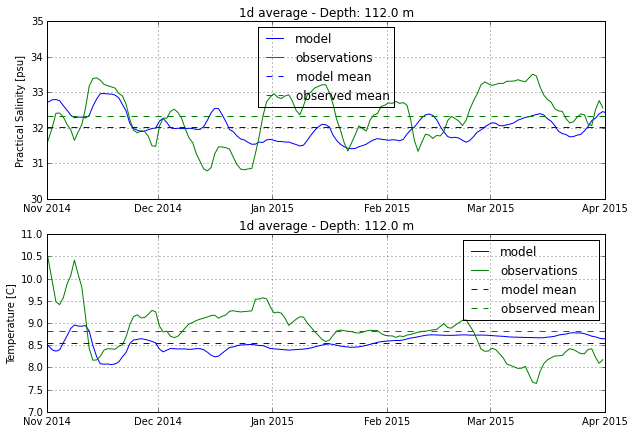

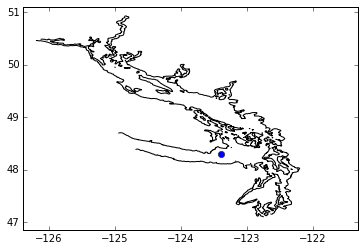

In [6]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1d', interp=True,
                                smin=30, smax=35, tmin=7, tmax=11)

* We are not capturing the monthly variability at all. Why? What is the source of deep water at this location?

# Boundary Pass

In [7]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/BoundaryPass//'
               'BoundaryPass_BoundaryPassMooring_CTD_20140411T175025Z_20150408T235058Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2014,10,10)
results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/early-days/'

In [8]:
reload(ONC)

<module 'ONC' from 'ONC.pyc'>

Model bathymetry: 205.0
Model bathymetry: 205.0


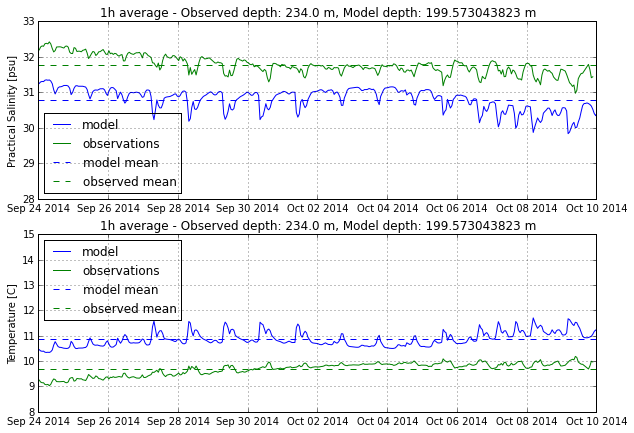

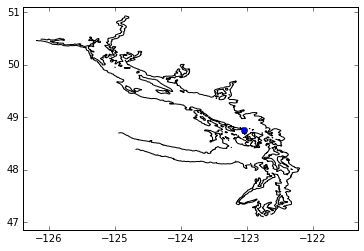

In [9]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1h', interp=False,
                                smin=28, smax=33, tmin=8, tmax=15)

* Mooring is about 30 m deeper than the model bathymetry at this location. So, I can't interpolate to this depth since it is outside of the model depth range. 
* Our daily 'fresh/warm pulses' look good - about the right amplitude and timing. Maybe a little bit strong in the amplitude.   
* On average, we are too fresh (~1psu) and too warm (~1degC). But, we are also 30 m higher in depth. 
* These comparisons are at the very start of our nowcasts. Unfortunately, we don't have any more recent data.